In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from collections import deque


In [73]:
def generate_tree_graph(m, num_levels):

    G = nx.Graph()
    node_counter = 1

    def add_nodes_and_edges(parent, current_level):
        nonlocal node_counter
        if current_level == 0:
            return

        for _ in range(m):
            child = node_counter
            node_counter += 1
            G.add_node(child)
            G.add_edge(parent, child)
            add_nodes_and_edges(child, current_level - 1)

    root = 1
    G.add_node(root)
    add_nodes_and_edges(root, num_levels - 1)

    G.remove_edge(1,1)
    return G

def propagate_info(graph, infected_nodes, probability_infection):
    infected_nodes = set(initial_infected)
    queue = initial_infected.copy()

    while queue:
        current_node, depth = queue.pop(0)

        if depth < num_levels - 1:
            neighbors = list(graph.neighbors(current_node))
            for neighbor in neighbors:
                if random.uniform(0, 1) < probability_infection and (neighbor, depth + 1) not in infected_nodes:
                    infected_nodes.add((neighbor, depth + 1))
                    queue.append((neighbor, depth + 1))

    return [node for node, depth in infected_nodes]

def plot_tree_with_infected(graph, infected_nodes):

    pos = nx.spring_layout(graph)
    plt.figure(figsize=(16, 16))
    nx.draw(graph, pos, with_labels=True, font_weight='bold', node_size=200, node_color='lightgrey')
    nx.draw_networkx_nodes(graph, pos, nodelist=infected_nodes, node_color='red')
    plt.show()

def plot_tree_with_adjacency_matrix(graph):

    adjacency_matrix = nx.to_numpy_array(graph)
    plt.figure(figsize=(8, 8))
    plt.imshow(adjacency_matrix, cmap='viridis', interpolation='none')
    plt.title('Matriz de adjacência')
    plt.show()


In [101]:
degree = 5
num_levels = 4
probability_infection = 0.8

tree = generate_tree_graph(degree, num_levels)

initial_infected = [(1, 0)] 

In [102]:
infected_nodes = propagate_info(tree, initial_infected, probability_infection)

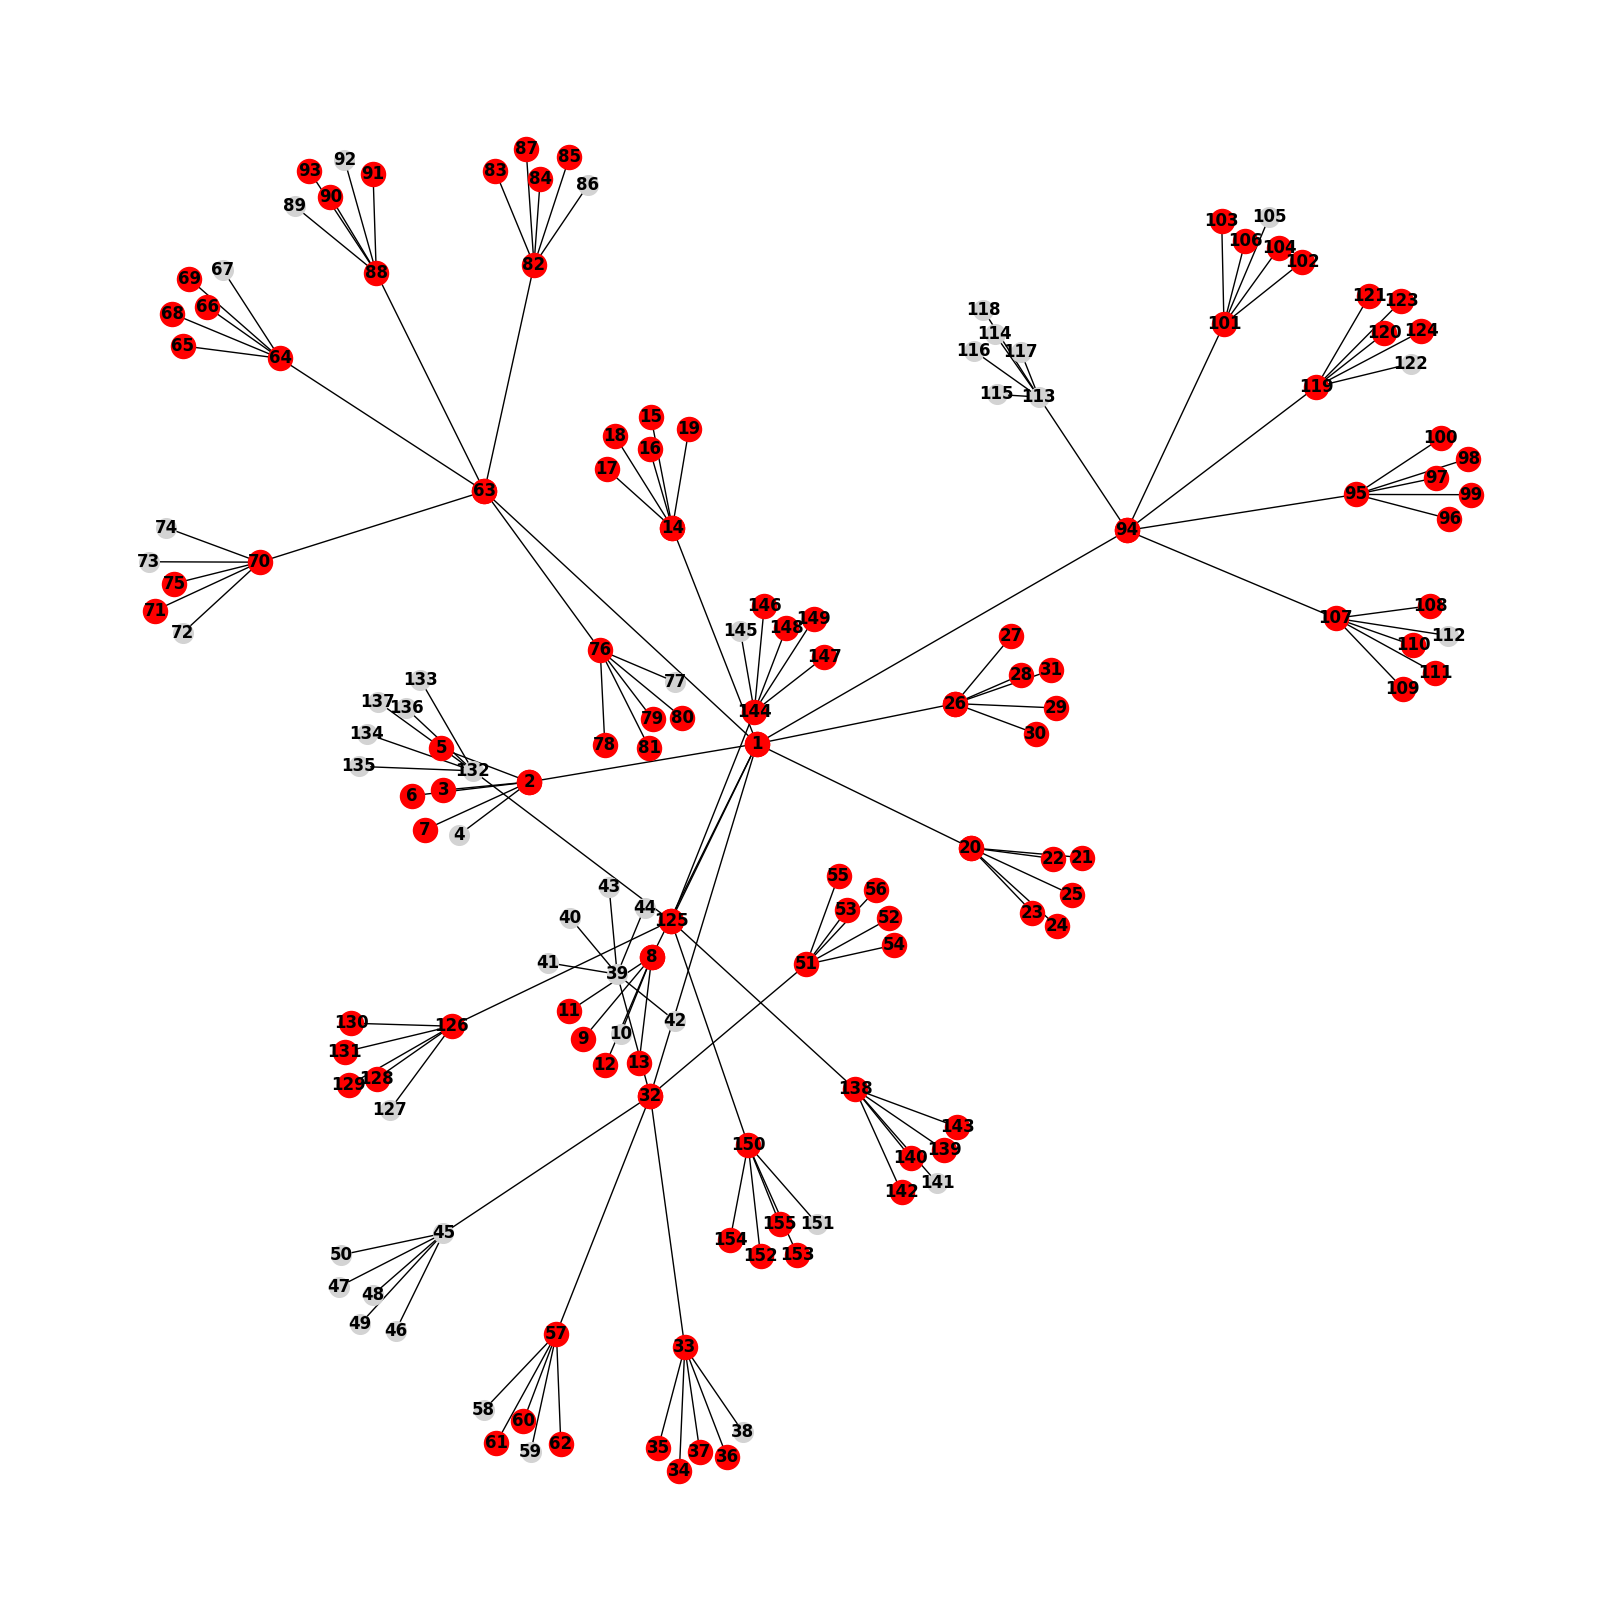

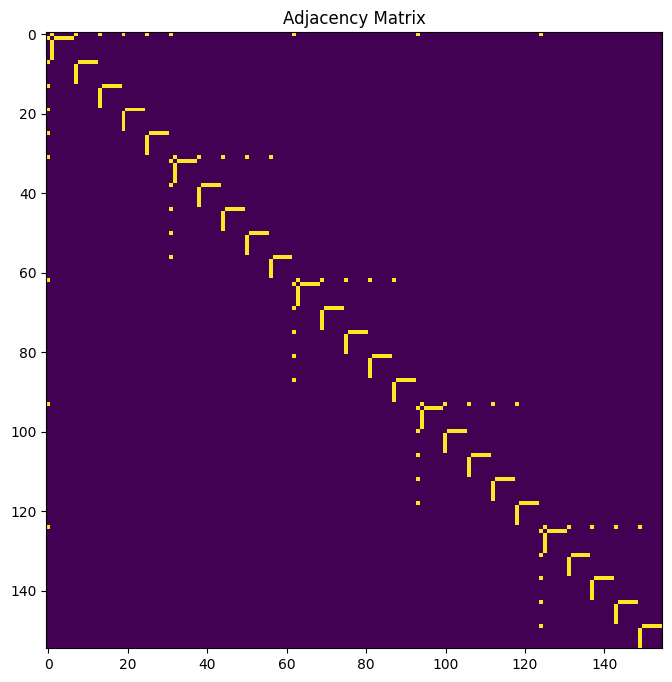

In [103]:
plot_tree_with_infected(tree, infected_nodes)
plot_tree_with_adjacency_matrix(tree)

In [87]:
?nx.draw

Signature: nx.draw(G, pos=None, ax=None, **kwds)
Docstring:
Draw the graph G with Matplotlib.

Draw the graph as a simple representation with no node
labels or edge labels and using the full Matplotlib figure area
and no axis labels by default.  See draw_networkx() for more
full-featured drawing that allows title, axis labels etc.

Parameters
----------
G : graph
    A networkx graph

pos : dictionary, optional
    A dictionary with nodes as keys and positions as values.
    If not specified a spring layout positioning will be computed.
    See :py:mod:`networkx.drawing.layout` for functions that
    compute node positions.

ax : Matplotlib Axes object, optional
    Draw the graph in specified Matplotlib axes.

kwds : optional keywords
    See networkx.draw_networkx() for a description of optional keywords.

Examples
--------
>>> G = nx.dodecahedral_graph()
>>> nx.draw(G)
>>> nx.draw(G, pos=nx.spring_layout(G))  # use spring layout

See Also
--------
draw_networkx
draw_networkx_nodes
d